In [10]:
import nltk
#nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import csv
import matplotlib.pyplot as plt

In [20]:
def fetch_file(filename):                                           #function to fetch a file and return a list of reviews.
    try:
        with open(filename) as f:                          # or , encoding=utf8
            return [line.rstrip() for line in f if line.rstrip()]
    except IOError:
        print("Error File Does Not Exist")
        return []



def stopW(ls):                                                     #function to remove stop words and return a list of tokens
    word_tokens = word_tokenize(ls) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_wordset] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_wordset: 
            filtered_sentence.append(w)
            #Tokens.append(w)
    return filtered_sentence




def vector(ls):                                                 #function to create a systematic vocabulary
    vectorizer = CountVectorizer(min_df=0, lowercase=False)     #from sklearn.feature_extraction.text import CountVectorizer
    vectorizer.fit(ls)
    return list(vectorizer.vocabulary_)




def check(ls):                                                  #function that returns the polarity of a passed sentence
    positive_score = 0
    negative_score = 0


    for i in range(0,len(ls)):
        if [ls[i]] in positive_list:
            positive_score = positive_score +1

        
        if [ls[i]] in negative_list:
            negative_score = negative_score +1
        
        else:
            continue
        
    
    try:
        positive_polarity = (positive_score/(positive_score + negative_score))
        print("Positive Polarity: ", positive_polarity)
        negative_polarity = (negative_score/(positive_score + negative_score))
        print("Negative Polarity: ", negative_polarity)
        if(positive_polarity > negative_polarity):
            print(1)
            return 1
        else:
            print(0)
            return 0

    except ZeroDivisionError:
        print("Neutral Line")
        return 'x'

## Positive Lexicons
The Positive Vocabulary.

In [21]:
positive_list = []

with open('pos_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        positive_list.append(row)

print(positive_list)
csvFile.close()

[['a+'], ['abound'], ['abounds'], ['abundance'], ['abundant'], ['accessable'], ['accessible'], ['acclaim'], ['acclaimed'], ['acclamation'], ['accolade'], ['accolades'], ['accommodative'], ['accomodative'], ['accomplish'], ['accomplished'], ['accomplishment'], ['accomplishments'], ['accurate'], ['accurately'], ['achievable'], ['achievement'], ['achievements'], ['achievible'], ['acumen'], ['adaptable'], ['adaptive'], ['adequate'], ['adjustable'], ['admirable'], ['admirably'], ['admiration'], ['admire'], ['admirer'], ['admiring'], ['admiringly'], ['adorable'], ['adore'], ['adored'], ['adorer'], ['adoring'], ['adoringly'], ['adroit'], ['adroitly'], ['adulate'], ['adulation'], ['adulatory'], ['advanced'], ['advantage'], ['advantageous'], ['advantageously'], ['advantages'], ['adventuresome'], ['adventurous'], ['advocate'], ['advocated'], ['advocates'], ['affability'], ['affable'], ['affably'], ['affectation'], ['affection'], ['affectionate'], ['affinity'], ['affirm'], ['affirmation'], ['affi

## Negative Lexicons
The Negative Vocabulary.

In [22]:
negative_list = []

with open('neg_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        negative_list.append(row)

print(negative_list)
csvFile.close()

[['ï»¿2-faced'], ['2-faces'], ['abnormal'], ['abolish'], ['abominable'], ['abominably'], ['abominate'], ['abomination'], ['abort'], ['aborted'], ['aborts'], ['abrade'], ['abrasive'], ['abrupt'], ['abruptly'], ['abscond'], ['absence'], ['absent-minded'], ['absentee'], ['absurd'], ['absurdity'], ['absurdly'], ['absurdness'], ['abuse'], ['abused'], ['abuses'], ['abusive'], ['abysmal'], ['abysmally'], ['abyss'], ['accidental'], ['accost'], ['accursed'], ['accusation'], ['accusations'], ['accuse'], ['accuses'], ['accusing'], ['accusingly'], ['acerbate'], ['acerbic'], ['acerbically'], ['ache'], ['ached'], ['aches'], ['achey'], ['aching'], ['acrid'], ['acridly'], ['acridness'], ['acrimonious'], ['acrimoniously'], ['acrimony'], ['adamant'], ['adamantly'], ['addict'], ['addicted'], ['addicting'], ['addicts'], ['admonish'], ['admonisher'], ['admonishingly'], ['admonishment'], ['admonition'], ['adulterate'], ['adulterated'], ['adulteration'], ['adulterier'], ['adversarial'], ['adversary'], ['adve

In [23]:
print("No. of words in positive lexicon:",len(positive_list))
print("No. of words in negative lexicon:",len(negative_list))

No. of words in positive lexicon: 2006
No. of words in negative lexicon: 4787


## StopWords
#### Common words that don't have any relevance.
The set of stop words had to be adjusted according to our need in the project.

In [24]:
stop_wordset = set(stopwords.words('english'))
stop_wordset.add('.')
stop_wordset.add(',')
stop_wordset.add('!')
stop_wordset.remove('not')
stop_wordset.remove('nor')
stop_wordset

{'!',
 ',',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 

In [25]:
print("No. of stop words:",len(stop_wordset))

No. of stop words: 180


# Main

In [39]:
Lines = fetch_file('dataset.txt')             #fn call to fetch file.
len(Lines)
Lines[1]

'I bought this device on release date itself im loving it i just want to say cons bcoz it has lot of pros, rear camera should improve a little bit it produces over saturation images and their is no eis i hope they will fix that via ota update'

In [40]:
pos_count = 0                                            #Initialising variables for keeping count of the postive, negative
neg_count = 0                                            # and neutral reviews.
neutral_count = 0
   
for i in range(0,len(Lines)):                                  
    Lines[i] = Lines[i].lower()                                #Lowercasing the text
    stp_lines = stopW(Lines[i])                                #Stop words removal fn
    vec_lines = vector(stp_lines)                              #Vocabulary creation
    print(vec_lines)
    pole = check(vec_lines)                                    #Polarity is ditermined
    
    if(pole == 'x'):
        neutral_count = neutral_count + 1
    
    if(pole == 1):
        pos_count = pos_count + 1
    
    else:
        neg_count = neg_count +1
    
    print("*"*30)
    

['amazing', 'powerful', 'beautiful', 'fon', 'oppo', 'best', 'camera', 'battery', 'design', 'display', 'sound', 'quality', 'processor']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['bought', 'device', 'release', 'date', 'im', 'loving', 'want', 'say', 'cons', 'bcoz', 'lot', 'pros', 'rear', 'camera', 'improve', 'little', 'bit', 'produces', 'saturation', 'images', 'eis', 'hope', 'fix', 'via', 'ota', 'update']
Positive Polarity:  0.75
Negative Polarity:  0.25
1
******************************
['got', '3hours', 'back', 'guess', 'look', 'mobile', 'extremely', 'premium', 'build', 'quality', 'awesome', 'camera', 'quite', 'good', 'first', 'review']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['using', 'phone', 'past', 'days', 'observe', 'lag', 'browse', 'photos', 'google', 'also', 'reason', 'youtube', 'videos', 'set', 'low', 'quality', 'means', 'not', 'able', 'change', 'camera', 'seem', 'good', 'much', 'colour', 'output', '

Positive Polarity:  0.9090909090909091
Negative Polarity:  0.09090909090909091
1
******************************
['except', 'camera', 'everything', 'fine', 'look', 'mobile', 'best', 'quality', 'images', 'go', 'good', 'deal']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['phone', 'packs', 'everything', 'price', 'range', 'comes', 'package', 'desirable', 'decent', 'camera', 'great', 'screen', 'good', 'enough', 'battery', 'frugal', 'power', 'consumption', 'average', 'usage', 'easily', 'take', 'day', 'paired', 'right', 'kind', 'earphones', 'makes', 'device', 'media', 'looks', 'gives', 'flagships', 'run', 'money', 'gorgeous', 'gradient', 'back', 'panel', 'covered', 'glass', 'build', 'quality', 'also', 'feels', 'feel', 'like', 'come', 'cost', 'sturdiness', 'panels', 'make', 'bit', 'vulnerable', 'crackling', 'solid', 'fit', 'finish']
Positive Polarity:  0.9090909090909091
Negative Polarity:  0.09090909090909091
1
******************************
['poor', 'quali

Positive Polarity:  0.7692307692307693
Negative Polarity:  0.23076923076923078
1
******************************
['amazing', 'happy', 'amazon', 'services']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['phone', 'excellent', 'choice', 'normal', 'usage', 'high', 'specs', 'modern', 'features', 'like', '6gb', 'memory', 'face', 'fingerprint', 'recognition', 'affordable', 'price', 'using', 'months', 'downside', 'see', 'battery', 'last', 'day']
Positive Polarity:  0.8
Negative Polarity:  0.2
1
******************************
['1st', 'design', 'build', 'quality', 'superb', 'mobile', 'price', 'range', 'gives', 'tht', 'premium', 'feel', 'fingerprint', 'face', 'unlock', 'works', 'fast', 'picture', 'good', 'sound', 'also', 'ok', 'could', 'hv', 'provided', '55', 'mm', 'jack', 'top', 'section', 'would', 'better', 'put', 'double', 'speakers', 'bottom', 'battery', 'drains', 'quickly', 'play', 'games', 'otherwise', 'full', 'day', 'backup', 'wid', 'moderate', 'use', 'op

Positive Polarity:  0.6666666666666666
Negative Polarity:  0.3333333333333333
1
******************************
['writing', 'opinions', 'using', 'phone', 'approx', 'months']
Neutral Line
******************************
['first', 'design', 'awesome', 'make', 'perfect', 'looking', 'phone', 'camera', 'quality', 'good', 'fast', 'finger', 'print', 'scanner', 'face', 'recognition', 'also', 'feature', 'means', 'quite', 'lot', 'features', 'reason', 'buy', 'product', 'budget', 'segment']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['screen', 'durability', 'bad', 'sensitive', 'so', 'many', 'reviews', 'shows', 'high', 'gorilla', 'glass', 'broken', 'even', 'fallen', '3ft', 'height', 'amazon', 'also', 'promised', 'give', 'replacement', 'upto', '6months', 'bought', 'handset', 'said', 'guarantee', 'receive', 'mail', 'get', 'till', 'now']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['audio', 'quality', 'poor', 'kind', 'vibrating',

Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['excellent', 'phone', 'range', 'features', 'available', '25k', '30k', 'premium', 'brand', 'phones', 'sound', 'quality', 'awesome', 'get', 'much', 'better', 'backup', '3750', 'mh', 'battery', 'picture', 'good', 'ips', 'display', 'use', 'samoled', 'little', 'bit', 'different', 'feel', 'overall', 'best']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['awesome', 'build', 'good', 'display', 'light', 'weight', 'total', 'beast', 'performance', 'glass', 'back', 'fingerprint', 'magnet', 'not', 'actual', 'issue', 'cover', 'screen', 'guard', 'included', 'box', 'lagging', 'hangs', 'battery', 'easily', 'lasts', 'days', 'depending', 'usage', 'camera', 'could', 'better', 'hisilicon', 'kirin', '710', 'powerhouse', 'regrets', 'choosing', 'snapdragon', 'soc', 'smartphone', 'cheers']
Positive Polarity:  0.375
Negative Polarity:  0.625
0
******************************
['product', 'good', 'b

In [41]:
print("No. of Neutral Reviews:", neutral_count)
print("No. of Positive Reviews:", pos_count)
print("No. of Negative Reviews:", neg_count)

No. of Neutral Reviews: 8
No. of Positive Reviews: 118
No. of Negative Reviews: 72


In [42]:
positive_polarity = (pos_count/(pos_count + neg_count))
print("Positive Polarity: ", positive_polarity)
negative_polarity = (neg_count/(pos_count + neg_count))
print("Negative Polarity: ", negative_polarity)

percent_pos = (pos_count/(pos_count + neg_count + neutral_count) * 100)
percent_neg = (neg_count/(pos_count + neg_count + neutral_count) * 100)
percent_neutral = (neutral_count/(pos_count + neg_count + neutral_count) * 100)
print(int(percent_neg),"%", int(percent_pos),"%", int(percent_neutral),"%")


Positive Polarity:  0.6210526315789474
Negative Polarity:  0.37894736842105264
36 % 59 % 4 %


# Graphical Representaion of Stats

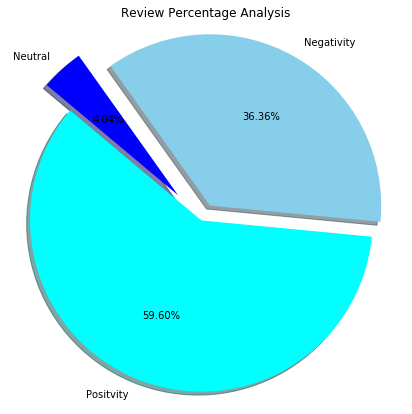

In [43]:
labels = 'Positvity', 'Negativity', 'Neutral'
sizes = [percent_pos, percent_neg, percent_neutral]
explode = (0, 0.1, 0.2) 
colours = ['cyan', 'skyblue', 'blue']

fig1, ax1 = plt.subplots()
fig = plt.gcf()  ####################################################
fig.set_size_inches(7,7)
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Review Percentage Analysis")
plt.show()

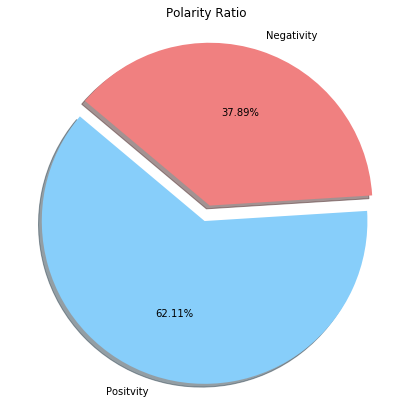

In [44]:
labels = 'Positvity', 'Negativity'
sizes = [(positive_polarity*100), (negative_polarity*100)]
explode = (0, 0.1)  
colours = ['lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
fig = plt.gcf() ########################################################
fig.set_size_inches(7,7)
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal') 
ax1.set_title("Polarity Ratio")

plt.show()